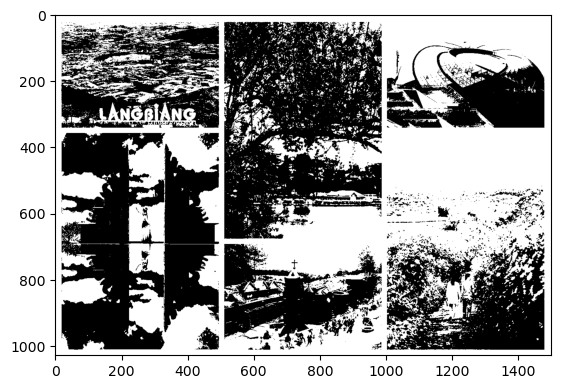

In [1]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters.thresholding import threshold_otsu

data = Image.open('./exercise/dalat.jpg').convert('L')
a = np.asarray(data)

# performing Otsu's thresholding
thres = threshold_otsu(a)

# pixels with intensity greater than threshold are kept
b = a > thres

b = Image.fromarray(b)

plt.imshow(b)
plt.show()

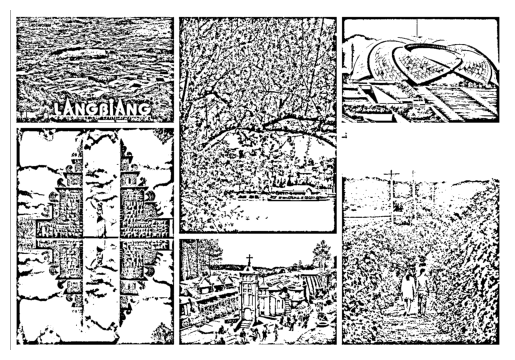

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_local

# Load the image and convert to grayscale ('L' mode)
data = Image.open('./exercise/dalat.jpg').convert('L')

# Convert image to numpy array
a = np.asarray(data)

# Perform local thresholding with block size 39 and offset 10
b = threshold_local(a, block_size=39, offset=10)

# Convert the thresholded result to a binary image (True/False)
binary_local = a > b

# Display the thresholded image
plt.imshow(binary_local, cmap='gray')
plt.axis('off')  # Hide axis
plt.show()


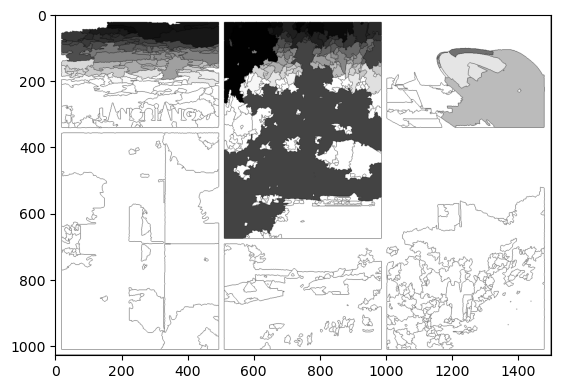

In [3]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# Opening the image and converting it to grayscale
data = cv2.imread('./exercise/dalat.jpg')

# Converting image from color to grayscale
a = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)

# Thresholding the image to obtain cell pixels
thresh, b1 = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Erosion operation is performed to remove noise
b2 = cv2.erode(b1, None, iterations=2)

# Distance transform is performed
dist_trans = cv2.distanceTransform(b2, 2, 3)

# Thresholding the distance transform image to obtain pixels that are foreground
thresh, dt = cv2.threshold(dist_trans, 1, 255, cv2.THRESH_BINARY)

# Performing labeling
labelled, ncc = label(dt)

# labelled is converted to 32-bit integer
labelled = labelled.astype(np.int32)

# Performing watershed
cv2.watershed(data, labelled)
b = Image.fromarray(labelled)

plt.imshow(b)
plt.show()

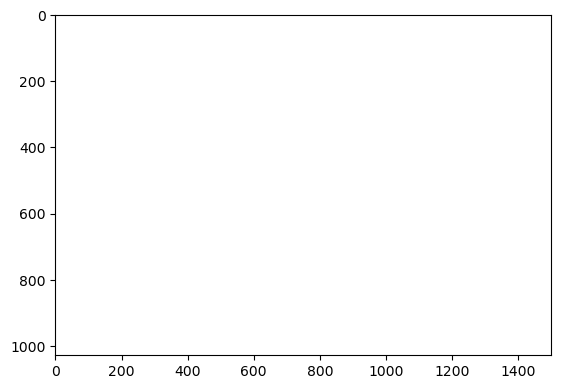

In [4]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# Opening the image and converting it to grayscale
data = Image.open('./exercise/dalat.jpg').convert('L')

# Performing binary dilation
b = nd.binary_dilation(data, iterations=50)

# Convert result back to image
c = Image.fromarray(b)

# Show the result
c.show()
plt.imshow(c, cmap='gray')
plt.show()


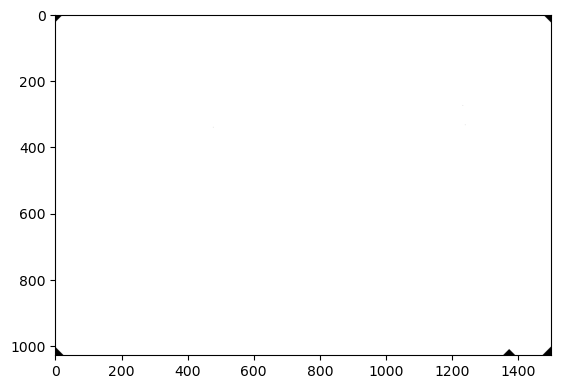

In [5]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# Opening the image and converting it to grayscale
data = Image.open('./exercise/dalat.jpg').convert('L')
data = np.array(data)

# Defining the structuring element
s = [[0, 1, 0],
     [1, 1, 1],
     [0, 1, 0]]

# Performing binary opening
b = nd.binary_opening(data, structure=s, iterations=25)

# Convert result back to image
c = Image.fromarray((b * 255).astype(np.uint8))

# Show results
c.show()
plt.imshow(c, cmap='gray')
plt.show()


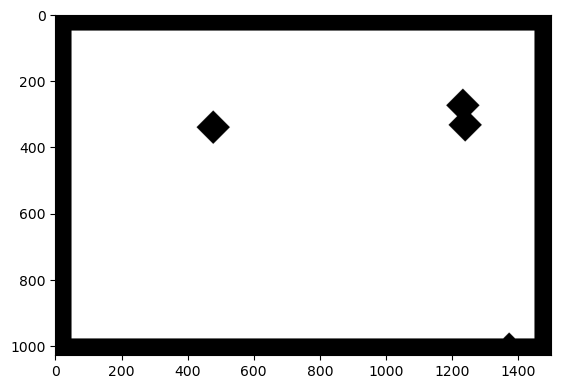

In [6]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# Opening the image and converting it to grayscale
data = Image.open('./exercise/dalat.jpg').convert('L')
data = np.array(data)

# Defining the structuring element (hình dấu cộng)
s = [[0, 1, 0],
     [1, 1, 1],
     [0, 1, 0]]

# Performing binary erosion (bào mòn các vùng trắng)
b = nd.binary_erosion(data, structure=s, iterations=50)

# Convert boolean array to image for display
c = Image.fromarray((b * 255).astype(np.uint8))

# Display the result
c.show()
plt.imshow(c, cmap='gray')
plt.show()


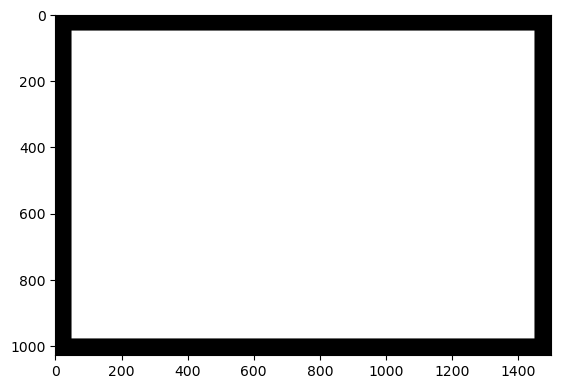

In [7]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# Opening the image and converting it to grayscale
data = Image.open('./exercise/dalat.jpg').convert('L')
data = np.array(data)

# Defining the structuring element (dạng dấu cộng)
s = [[0, 1, 0],
     [1, 1, 1],
     [0, 1, 0]]

# Performing binary closing (giống như vá lỗ hổng nhỏ trong vùng trắng)
b = nd.binary_closing(data, structure=s, iterations=50)

# Convert boolean array to displayable image
c = Image.fromarray((b * 255).astype(np.uint8))

# Show result
c.show()
plt.imshow(c, cmap='gray')
plt.show()


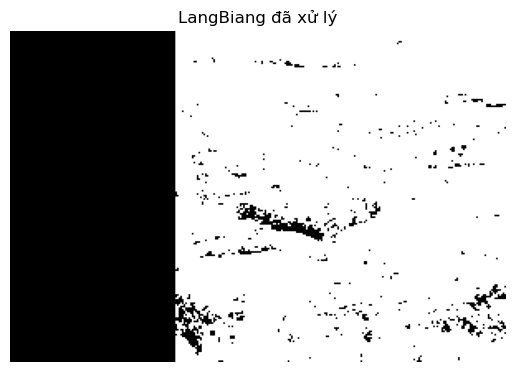

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Đường dẫn ảnh gốc
img_path = 'exercise/dalat.jpg'  # Đảm bảo file ảnh đúng tên
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Kiểm tra ảnh
if img is None:
    raise FileNotFoundError("Không tìm thấy ảnh da_lat.jpg trong thư mục exercise.")

# 1. Chọn vùng LangBiang (tọa độ này chỉ là ví dụ, bạn có thể điều chỉnh)
x, y, w, h = 200, 100, 300, 200  # tọa độ (x, y), kích thước (w, h)
region = img[y:y+h, x:x+w]

# 2. Tịnh tiến vùng chọn sang phải 100px
translated_region = np.zeros_like(region)
if region.shape[1] > 100:
    translated_region[:, 100:] = region[:, :-100]

# 3. Phân ngưỡng bằng Otsu kết hợp ngưỡng 0.3 (tùy biến)
# Chuẩn hóa ảnh về [0, 1]
region_norm = translated_region / 255.0
# Áp ngưỡng 0.3
_, binary = cv2.threshold(region_norm, 0.3, 1.0, cv2.THRESH_BINARY)

# 4. Chuyển về ảnh 8-bit và lưu
binary_uint8 = (binary * 255).astype(np.uint8)
save_path = 'lang_biang.jpg'
cv2.imwrite(save_path, binary_uint8)

# 5. Hiển thị ảnh
plt.imshow(binary_uint8, cmap='gray')
plt.title("LangBiang đã xử lý")
plt.axis('off')
plt.show()


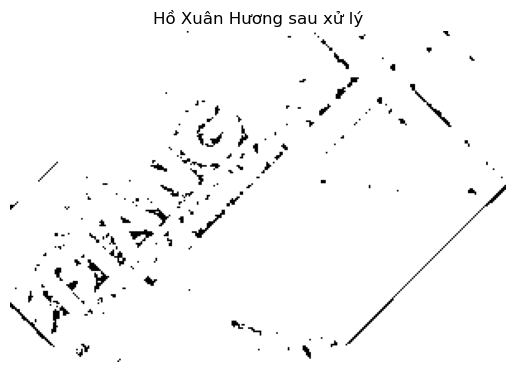

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh gốc dưới dạng grayscale
img_path = 'exercise/dalat.jpg'  # Đảm bảo đúng tên ảnh
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError("Không tìm thấy ảnh dalat.jpg.")

# 1. Cắt vùng Hồ Xuân Hương (tọa độ ví dụ, cần điều chỉnh nếu khác)
x, y, w, h = 250, 250, 300, 200  # Ví dụ: tọa độ và kích thước vùng chọn
region = img[y:y+h, x:x+w]

# 2. Xoay vùng chọn quanh tâm 45 độ
center = (w // 2, h // 2)
matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(region, matrix, (w, h), flags=cv2.INTER_LINEAR)

# 3. Áp dụng Adaptive Thresholding (với giá trị ngưỡng 60 là C)
adaptive = cv2.adaptiveThreshold(
    rotated,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,
    thresholdType=cv2.THRESH_BINARY,
    blockSize=11,  # block size lẻ > 1
    C=60  # giá trị C trong adaptive threshold
)

# 4. Lưu ảnh và hiển thị
cv2.imwrite('ho_xuan_huong.jpg', adaptive)

# Hiển thị ảnh
plt.imshow(adaptive, cmap='gray')
plt.title("Hồ Xuân Hương sau xử lý")
plt.axis('off')
plt.show()


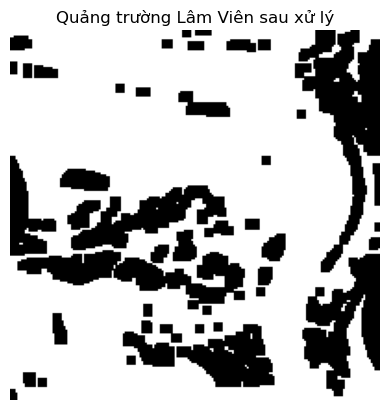

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh
img_path = 'exercise/dalat.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError("Không tìm thấy ảnh da_lat.jpg.")

# 1. Chọn vùng Quảng trường Lâm Viên (tọa độ ví dụ)
x, y, w, h = 350, 150, 200, 200  # Điều chỉnh theo vị trí thật
region = img[y:y+h, x:x+w]

# 2. Coordinate Mapping (biến đổi dạng sóng nhẹ)
rows, cols = region.shape
map_x = np.zeros_like(region, dtype=np.float32)
map_y = np.zeros_like(region, dtype=np.float32)

for i in range(rows):
    for j in range(cols):
        map_x[i, j] = j + 10 * np.sin(i / 20.0)
        map_y[i, j] = i

# Apply mapping
mapped = cv2.remap(region, map_x, map_y, interpolation=cv2.INTER_LINEAR)

# 3. Binary Closing
# Binarize ảnh bằng threshold
_, binary = cv2.threshold(mapped, 127, 255, cv2.THRESH_BINARY)

# Áp dụng Closing (dilate rồi erode)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# 4. Lưu và hiển thị
cv2.imwrite('quang_truong_lam_vien.jpg', closed)

plt.imshow(closed, cmap='gray')
plt.title("Quảng trường Lâm Viên sau xử lý")
plt.axis('off')
plt.show()


=== MENU CHỌN XỬ LÝ ẢNH ===
1. geometric_transformation:
   a. coordinate_mapping
   b. Rotate
   c. Scale
   d. Shift
2. segment:
   e. Adaptive_thresholding
   f. Binary_dilation
   g. Binary_erosion
   h. Otsu
Bạn có thể chọn 1 hoặc kết hợp 1 mục geometric + 1 mục segment (vd: b,h)


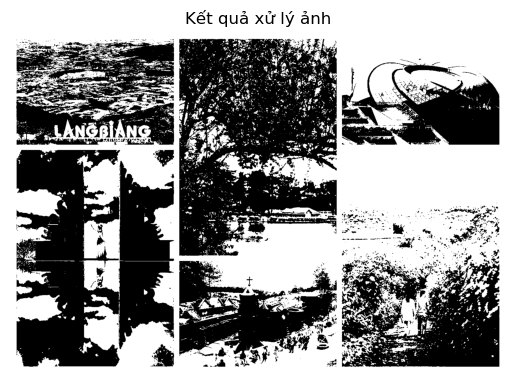

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Các hàm xử lý ---

def rotate_image(img, angle=45):
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(img, matrix, (w, h))

def scale_image(img, fx=1.5, fy=1.5):
    return cv2.resize(img, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)

def shift_image(img, tx=50, ty=50):
    matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    (h, w) = img.shape[:2]
    return cv2.warpAffine(img, matrix, (w, h))

def coordinate_mapping(img):
    rows, cols = img.shape
    map_x = np.zeros_like(img, dtype=np.float32)
    map_y = np.zeros_like(img, dtype=np.float32)
    for i in range(rows):
        for j in range(cols):
            map_x[i, j] = j + 10 * np.sin(i / 20.0)
            map_y[i, j] = i
    return cv2.remap(img, map_x, map_y, interpolation=cv2.INTER_LINEAR)

def adaptive_thresholding(img):
    return cv2.adaptiveThreshold(
        img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY, blockSize=11, C=2
    )

def binary_dilation(img):
    kernel = np.ones((5,5), np.uint8)
    return cv2.dilate(img, kernel, iterations=1)

def binary_erosion(img):
    kernel = np.ones((5,5), np.uint8)
    return cv2.erode(img, kernel, iterations=1)

def otsu_threshold(img):
    _, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary

# --- Chương trình chính ---

# Đọc ảnh gốc
img = cv2.imread('exercise/dalat.jpg', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Không tìm thấy ảnh da_lat.jpg trong thư mục exercise.")

# In menu
print("=== MENU CHỌN XỬ LÝ ẢNH ===")
print("1. geometric_transformation:")
print("   a. coordinate_mapping")
print("   b. Rotate")
print("   c. Scale")
print("   d. Shift")
print("2. segment:")
print("   e. Adaptive_thresholding")
print("   f. Binary_dilation")
print("   g. Binary_erosion")
print("   h. Otsu")
print("Bạn có thể chọn 1 hoặc kết hợp 1 mục geometric + 1 mục segment (vd: b,h)")

# Nhập lựa chọn
choice = input("Nhập lựa chọn (vd: b,h): ").lower().replace(" ", "").split(",")

# Thực hiện xử lý
processed = img.copy()

for ch in choice:
    if ch == "a":
        processed = coordinate_mapping(processed)
    elif ch == "b":
        processed = rotate_image(processed)
    elif ch == "c":
        processed = scale_image(processed)
    elif ch == "d":
        processed = shift_image(processed)
    elif ch == "e":
        processed = adaptive_thresholding(processed)
    elif ch == "f":
        processed = binary_dilation(processed)
    elif ch == "g":
        processed = binary_erosion(processed)
    elif ch == "h":
        processed = otsu_threshold(processed)
    else:
        print(f"Lựa chọn không hợp lệ: {ch}")

# Lưu kết quả
cv2.imwrite("output_menu.jpg", processed)

# Hiển thị
plt.imshow(processed, cmap='gray')
plt.title("Kết quả xử lý ảnh")
plt.axis('off')
plt.show()
